In [1]:
import numpy as np
import faiss
import matplotlib.pyplot as plt
import time

In [2]:
# Build random data
np.random.seed(42)
X = np.random.rand(1000, 2).astype('float32')  # 1000 data 2D
query = np.array([[0.5, 0.5]], dtype='float32')  # query point

In [3]:
# Search NN using Exact NN
index_flat = faiss.IndexFlatL2(2)   # L2 = Euclidean distance
index_flat.add(X)

# Compute Exact NN Time
start = time.time()
D_flat, I_flat = index_flat.search(query, 3)  # Find 3 NN
end = time.time()
time_flat = end - start

In [4]:
# Compute FAISS
nlist = 10   # n-cluster (inverted list)
m = 2        # number of subvector
quantizer = faiss.IndexFlatL2(2)   # used by IVF for initiatl cluster
index_ivfpq = faiss.IndexIVFPQ(quantizer, 2, nlist, m, 8)  # 8 bit per subvector

index_ivfpq.train(X)  # training centroid
index_ivfpq.add(X)

start = time.time()
D_ivfpq, I_ivfpq = index_ivfpq.search(query, 3)
end = time.time()
time_ivfpq = end - start

In [5]:
# Print The Peformances
print("Exact NN (Flat) indices:", I_flat, "distances:", D_flat)
print("IVF+PQ indices:", I_ivfpq, "distances:", D_ivfpq)
print("Waktu Exact:", time_flat)
print("Waktu IVF+PQ:", time_ivfpq)

Exact NN (Flat) indices: [[137 170 750]] distances: [[0.00013095 0.00077404 0.00079751]]
IVF+PQ indices: [[137 170 750]] distances: [[0.00012945 0.00079226 0.00080067]]
Waktu Exact: 0.00021314620971679688
Waktu IVF+PQ: 0.00135040283203125


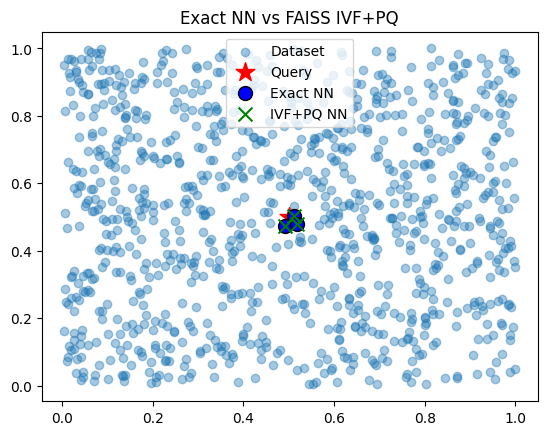

In [6]:
# Visualize
plt.scatter(X[:,0], X[:,1], alpha=0.4, label="Dataset")
plt.scatter(query[:,0], query[:,1], c='red', marker='*', s=200, label="Query")

# Flat NN -> Exact NN
plt.scatter(X[I_flat[0],0], X[I_flat[0],1], c='blue', s=100, edgecolor='k', label="Exact NN")

# IVF+PQ NN -> FAISS
plt.scatter(X[I_ivfpq[0],0], X[I_ivfpq[0],1], c='green', marker='x', s=100, label="IVF+PQ NN")

plt.legend()
plt.title("Exact NN vs FAISS IVF+PQ")
plt.show()

FAISS IVF+PQ is a powerful approximate nearest neighbor method that offers high accuracy and speed, especially suitable for large-scale similarity search tasks. In small datasets like this experiment, it performs comparably (or even identically) to Exact NN, but with better speed.